# Experimental Results

In [1]:
import sys
sys.path.append('/home/kelvin.wong/Developer/chexpert-fusion/fusion_experiments/')

import os
import torch
import tempfile
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt

from config.chexpert import PAPER_TRAINING_CLASSES

%matplotlib inline

/home/kelvin.wong/.cache/bazel/_bazel_kelvin.wong/47fc07a62b8a2107c2e1b04eb7772dd1/execroot/__main__/bazel-out/release_links/lib/python_env/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
NUM_GPUS = '1'
BATCH_SIZE = '100'
LABEL_CLASS = 'paper'
OUTDIR = tempfile.mkdtemp()

MIMIC_DATASET_PATH = '/home/kelvin.wong/Datasets/MIMIC-CXR'
CHEXPERT_DATASET_PATH = '/home/kelvin.wong/Datasets/CheXpert-v1.0'

EVALUATION_ARGUMENTS = [
    '--evaluate-once',
    '--use-test-set',
    '--cuda-benchmark',
    '--map-unobserved-to-negative',
    '--label-class',    LABEL_CLASS,
    '--num-gpus',       NUM_GPUS,
    '--val-batch-size', BATCH_SIZE,
    '--outdir',         OUTDIR,
]

CHEXPERT_EVALUATION_ARGUMENTS = EVALUATION_ARGUMENTS + [
    '--dataset-class', 'PairedOnlyCustomSplit',
    '--train-data',    CHEXPERT_DATASET_PATH,
    '--val-data',      CHEXPERT_DATASET_PATH,
]

MIMIC_EVALUATION_ARGUMENTS = EVALUATION_ARGUMENTS + [
    '--dataset-class', 'PairedOnlyMIMICDataset',
    '--train-data',    MIMIC_DATASET_PATH,
    '--val-data',      MIMIC_DATASET_PATH,
]


## 1. Single View Baselines

### 1.1 CheXpert Test Metrics

In [3]:
from experiments.fusion_baselines.train_baselines import train_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/baseline_frontal/models/model_best.pth.tar'
frontal_baseline_chexpert_metrics = train_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--view', 'frontal', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/baseline_frontal/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=-1, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800, view='frontal')
Val Epoch 28 [1/8]: Loss - 0.3170 Val Time - 6.2826 Forward Time - 6.2297 Learning Rate - 0.0000 Memory - 0.329891328 GB AUC - 0.8094 AP - 0.4740 
Val Epoch 28 [2/8]: Loss - 0.3547 Val Time - 0.4884 Forward Time - 0.0261 Learning Rate - 0.0000 Memory - 0.329891328 GB AUC - 0.8001 AP - 0.4716 
Val Epoch 28

In [4]:
from experiments.fusion_baselines.train_baselines import train_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/baseline_lateral/models/model_best.pth.tar'
lateral_baseline_chexpert_metrics = train_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--view', 'lateral', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/baseline_lateral/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=-1, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800, view='lateral')
Val Epoch 29 [1/8]: Loss - 0.3282 Val Time - 0.4973 Forward Time - 0.0401 Learning Rate - 0.0000 Memory - 0.358170112 GB AUC - 0.7500 AP - 0.4078 
Val Epoch 29 [2/8]: Loss - 0.3604 Val Time - 0.4870 Forward Time - 0.0356 Learning Rate - 0.0000 Memory - 0.358170112 GB AUC - 0.7632 AP - 0.4065 
Val Epoch 29

### 1.2 MIMIC CXR Valid Metrics

In [5]:
from experiments.fusion_baselines.train_baselines import train_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/baseline_frontal/models/model_best.pth.tar'
frontal_baseline_mimic_metrics = train_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--view', 'frontal', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/baseline_frontal/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=-1, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800, view='frontal')
Val Epoch 28 [1/9]: Loss - 0.2695 Val Time - 0.5225 Forward Time - 0.0385 Learning Rate - 0.0000 Memory - 0.358170112 GB AUC - 0.8139 AP - 0.3831 
Val Epoch 28 [2/9]: Loss - 0.1948 Val Time - 0.4930 Forward Time - 0.0352 Learning Rate - 0.0000 Memory - 0.358170112 GB AUC - 0.8463 AP - 0.3616 
Val Epoch 28 [3/9]:

In [6]:
from experiments.fusion_baselines.train_baselines import train_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/baseline_lateral/models/model_best.pth.tar'
lateral_baseline_mimic_metrics = train_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--view', 'lateral', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/baseline_lateral/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=-1, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800, view='lateral')
Val Epoch 29 [1/9]: Loss - 0.3160 Val Time - 0.5109 Forward Time - 0.0403 Learning Rate - 0.0000 Memory - 0.329891328 GB AUC - 0.7629 AP - 0.3926 
Val Epoch 29 [2/9]: Loss - 0.2128 Val Time - 0.4824 Forward Time - 0.0294 Learning Rate - 0.0000 Memory - 0.329891328 GB AUC - 0.8006 AP - 0.3825 
Val Epoch 29 [3/9]:

## 2. Multi-view Fusion Baselines

### 2.1 CheXpert Test Metrics

In [7]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_0/models/model_best.pth.tar'
fusion_baseline_0_chexpert_metrics = train_fusion_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '0', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_0/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=0, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 31 [1/8]: Loss - 0.3239 Val Time - 2.7306 Forward Time - 2.6845 Learning Rate - 0.0001 Memory - 0.339551232 GB AUC - 0.7949 AP - 0.4703 
Val Epoch 31 [2/8]: Loss - 0.3521 Val Time - 0.6835 Forward Time - 0.3451 Learning Rate - 0.0001 Memory - 0.339551232 GB AUC - 0.7921 AP - 0.4439 
Val Epoch 31 [3/8]: Loss - 

In [8]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_1/models/model_best.pth.tar'
fusion_baseline_1_chexpert_metrics = train_fusion_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '1', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_1/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=1, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 36 [1/8]: Loss - 0.3076 Val Time - 1.6320 Forward Time - 1.5896 Learning Rate - 0.0001 Memory - 0.349226496 GB AUC - 0.8031 AP - 0.4737 
Val Epoch 36 [2/8]: Loss - 0.3371 Val Time - 0.7745 Forward Time - 0.0526 Learning Rate - 0.0001 Memory - 0.349226496 GB AUC - 0.8093 AP - 0.4689 
Val Epoch 36 [3/8]: Loss - 

In [9]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_2/models/model_best.pth.tar'
fusion_baseline_2_chexpert_metrics = train_fusion_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '2', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_2/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=2, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 11 [1/8]: Loss - 0.2977 Val Time - 1.7841 Forward Time - 1.7331 Learning Rate - 0.0001 Memory - 0.414166528 GB AUC - 0.8145 AP - 0.5123 
Val Epoch 11 [2/8]: Loss - 0.3374 Val Time - 0.8760 Forward Time - 0.0573 Learning Rate - 0.0001 Memory - 0.414166528 GB AUC - 0.8138 AP - 0.4771 
Val Epoch 11 [3/8]: Loss - 

In [10]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_3/models/model_best.pth.tar'
fusion_baseline_3_chexpert_metrics = train_fusion_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '3', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_3/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=3, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 48 [1/8]: Loss - 0.3031 Val Time - 1.5605 Forward Time - 1.5025 Learning Rate - 0.0001 Memory - 0.472492544 GB AUC - 0.8112 AP - 0.5111 
Val Epoch 48 [2/8]: Loss - 0.3129 Val Time - 1.0120 Forward Time - 0.0855 Learning Rate - 0.0001 Memory - 0.472492544 GB AUC - 0.8249 AP - 0.5116 
Val Epoch 48 [3/8]: Loss - 

In [11]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_4/models/model_best.pth.tar'
fusion_baseline_4_chexpert_metrics = train_fusion_baselines(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '4', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_4/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=4, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 50 [1/8]: Loss - 0.3084 Val Time - 1.1636 Forward Time - 1.1104 Learning Rate - 0.0001 Memory - 0.42644224 GB AUC - 0.8070 AP - 0.4860 
Val Epoch 50 [2/8]: Loss - 0.3486 Val Time - 0.9921 Forward Time - 0.2801 Learning Rate - 0.0001 Memory - 0.42644224 GB AUC - 0.8068 AP - 0.4758 
Val Epoch 50 [3/8]: Loss - 0.

### 2.2 MIMIC CXR Valid Metrics

In [12]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_0/models/model_best.pth.tar'
fusion_baseline_0_mimic_metrics = train_fusion_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '0', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_0/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=0, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 31 [1/9]: Loss - 0.2719 Val Time - 0.5924 Forward Time - 0.0687 Learning Rate - 0.0001 Memory - 0.339551232 GB AUC - 0.8166 AP - 0.4147 
Val Epoch 31 [2/9]: Loss - 0.1901 Val Time - 0.5798 Forward Time - 0.0252 Learning Rate - 0.0001 Memory - 0.339551232 GB AUC - 0.8495 AP - 0.3998 
Val Epoch 31 [3/9]: Loss - 0.2760 

In [13]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_1/models/model_best.pth.tar'
fusion_baseline_1_mimic_metrics = train_fusion_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '1', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_1/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=1, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 36 [1/9]: Loss - 0.2823 Val Time - 0.7873 Forward Time - 0.0347 Learning Rate - 0.0001 Memory - 0.38399232 GB AUC - 0.7956 AP - 0.4283 
Val Epoch 36 [2/9]: Loss - 0.1970 Val Time - 0.8017 Forward Time - 0.0354 Learning Rate - 0.0001 Memory - 0.38399232 GB AUC - 0.8351 AP - 0.4405 
Val Epoch 36 [3/9]: Loss - 0.2709 Va

In [14]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_2/models/model_best.pth.tar'
fusion_baseline_2_mimic_metrics = train_fusion_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '2', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_2/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=2, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 11 [1/9]: Loss - 0.2926 Val Time - 0.8790 Forward Time - 0.0594 Learning Rate - 0.0001 Memory - 0.414166528 GB AUC - 0.8296 AP - 0.4276 
Val Epoch 11 [2/9]: Loss - 0.2035 Val Time - 0.8534 Forward Time - 0.0506 Learning Rate - 0.0001 Memory - 0.414166528 GB AUC - 0.8556 AP - 0.4347 
Val Epoch 11 [3/9]: Loss - 0.2762 

In [15]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_3/models/model_best.pth.tar'
fusion_baseline_3_mimic_metrics = train_fusion_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '3', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_3/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=3, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 48 [1/9]: Loss - 0.2737 Val Time - 0.9654 Forward Time - 0.0517 Learning Rate - 0.0001 Memory - 0.472492544 GB AUC - 0.8238 AP - 0.4320 
Val Epoch 48 [2/9]: Loss - 0.1950 Val Time - 0.9431 Forward Time - 0.0552 Learning Rate - 0.0001 Memory - 0.472492544 GB AUC - 0.8486 AP - 0.4312 
Val Epoch 48 [3/9]: Loss - 0.2753 

In [16]:
from experiments.fusion_baselines.train_fusion_baselines import train_fusion_baselines

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_4/models/model_best.pth.tar'
fusion_baseline_4_mimic_metrics = train_fusion_baselines(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '4', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/fusion_baselines_4/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=4, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 50 [1/9]: Loss - 0.2762 Val Time - 1.0990 Forward Time - 0.3049 Learning Rate - 0.0001 Memory - 0.487583232 GB AUC - 0.8040 AP - 0.4127 
Val Epoch 50 [2/9]: Loss - 0.1854 Val Time - 0.9738 Forward Time - 0.3043 Learning Rate - 0.0001 Memory - 0.487583232 GB AUC - 0.8402 AP - 0.4167 
Val Epoch 50 [3/9]: Loss - 0.2681 

## 3. Volumetric Fusion

### 3.1 CheXpert Test Metrics

In [17]:
from experiments.fusion_baselines.train_volumetric_fusion import train_volumetric_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/volumetric_fusion/models/model_best.pth.tar'
volumetric_fusion_chexpert_metrics = train_volumetric_fusion(CHEXPERT_EVALUATION_ARGUMENTS + ['--val-batch-size', '8', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/volumetric_fusion/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=-1, is_big=False, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_2d_conv=False, use_test_set=True, val_batch_size=8, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in

/home/kelvin.wong/.cache/bazel/_bazel_kelvin.wong/47fc07a62b8a2107c2e1b04eb7772dd1/execroot/__main__/bazel-out/release_links/lib/python_env/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Val Epoch 40 [2/89]: Loss - 0.2535 Val Time - 0.4321 Forward Time - 0.0478 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.9021 AP - 0.5710 
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Val Epoch 40 [3/89]: Loss - 0.4966 Val Time - 0.4218 Forward Time - 0.0234 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8155 AP - 0.4528 
Val Epoch 40 [4/89]: Loss - 0.2193 Val Time - 0.4299 Forward Time - 0.0239 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8114 AP - 0.3603 
Val Epoch 40 [5/89]: Loss - 0.3683 Val Time - 0.4170 Forward Time - 0.0211 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8094 AP - 0.3634 
Val Epoch 40 [6/89]: Loss - 0.1619 Val Time - 0.4213 Forward Time - 0.0209 Learning Rate - 0.0001 Memory 

Val Epoch 40 [56/89]: Loss - 0.2061 Val Time - 0.4248 Forward Time - 0.0208 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8237 AP - 0.4960 
Val Epoch 40 [57/89]: Loss - 0.2314 Val Time - 0.4222 Forward Time - 0.0201 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8264 AP - 0.5023 
Val Epoch 40 [58/89]: Loss - 0.2531 Val Time - 0.4249 Forward Time - 0.0368 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8263 AP - 0.4999 
Val Epoch 40 [59/89]: Loss - 0.3540 Val Time - 0.4228 Forward Time - 0.0218 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8273 AP - 0.5045 
Val Epoch 40 [60/89]: Loss - 0.4435 Val Time - 0.4242 Forward Time - 0.0216 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8234 AP - 0.4976 
Val Epoch 40 [61/89]: Loss - 0.1943 Val Time - 0.4283 Forward Time - 0.0205 Learning Rate - 0.0001 Memory - 0.106436608 GB AUC - 0.8247 AP - 0.4970 
Val Epoch 40 [62/89]: Loss - 0.2181 Val Time - 0.4206 Forward Time - 0.0206 Learning Rate - 0.0001 Memory 

### 3.2 MIMIC CXR Valid Metrics

In [18]:
from experiments.fusion_baselines.train_volumetric_fusion import train_volumetric_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/volumetric_fusion/models/model_best.pth.tar'
volumetric_fusion_mimic_metrics = train_volumetric_fusion(MIMIC_EVALUATION_ARGUMENTS + ['--val-batch-size', '8', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/volumetric_fusion/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=-1, is_big=False, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_2d_conv=False, use_test_set=True, val_batch_size=8, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that c

Val Epoch 40 [44/110]: Loss - 0.1849 Val Time - 0.4239 Forward Time - 0.0233 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8481 AP - 0.4272 
Val Epoch 40 [45/110]: Loss - 0.0706 Val Time - 0.4319 Forward Time - 0.0402 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8488 AP - 0.4249 
Val Epoch 40 [46/110]: Loss - 0.0800 Val Time - 0.4224 Forward Time - 0.0220 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8506 AP - 0.4242 
Val Epoch 40 [47/110]: Loss - 0.1280 Val Time - 0.4352 Forward Time - 0.0347 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8519 AP - 0.4225 
Val Epoch 40 [48/110]: Loss - 0.3448 Val Time - 0.4234 Forward Time - 0.0216 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8469 AP - 0.4207 
Val Epoch 40 [49/110]: Loss - 0.1769 Val Time - 0.4244 Forward Time - 0.0213 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8465 AP - 0.4157 
Val Epoch 40 [50/110]: Loss - 0.2657 Val Time - 0.4294 Forward Time - 0.0209 Learning Rate - 0.0001 

Val Epoch 40 [99/110]: Loss - 0.1592 Val Time - 0.4360 Forward Time - 0.0231 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8481 AP - 0.4144 
Val Epoch 40 [100/110]: Loss - 0.2989 Val Time - 0.4385 Forward Time - 0.0197 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8480 AP - 0.4152 
Val Epoch 40 [101/110]: Loss - 0.2821 Val Time - 0.4281 Forward Time - 0.0196 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8476 AP - 0.4142 
Val Epoch 40 [102/110]: Loss - 0.4617 Val Time - 0.4381 Forward Time - 0.0200 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8464 AP - 0.4135 
Val Epoch 40 [103/110]: Loss - 0.1166 Val Time - 0.4323 Forward Time - 0.0197 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8468 AP - 0.4160 
Val Epoch 40 [104/110]: Loss - 0.1349 Val Time - 0.4368 Forward Time - 0.0197 Learning Rate - 0.0001 Memory - 0.106960896 GB AUC - 0.8469 AP - 0.4140 
Val Epoch 40 [105/110]: Loss - 0.1659 Val Time - 0.4349 Forward Time - 0.0194 Learning Rate - 0

## 4. Cross Sectional Fusion

### 4.1 CheXpert Test Metrics

In [19]:
from experiments.fusion_baselines.train_cross_sectional_fusion import train_cross_sectional_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_0/models/model_best.pth.tar'
cross_sectional_fusion_0_chexpert_metrics = train_cross_sectional_fusion(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '0', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_0/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=0, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 38 [1/8]: Loss - 0.3035 Val Time - 0.6446 Forward Time - 0.2026 Learning Rate - 0.0001 Memory - 0.359062016 GB AUC - 0.8154 AP - 0.5121 
Val Epoch 38 [2/8]: Loss - 0.3301 Val Time - 0.5353 Forward Time - 0.0366 Learning Rate - 0.0001 Memory - 0.359062016 GB AUC - 0.8109 AP - 0.4754 
Val Epoch 38 [3/8]: L

In [20]:
from experiments.fusion_baselines.train_cross_sectional_fusion import train_cross_sectional_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_4/models/model_best.pth.tar'
cross_sectional_fusion_4_chexpert_metrics = train_cross_sectional_fusion(CHEXPERT_EVALUATION_ARGUMENTS + ['--fusion-index', '4', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_4/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=4, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Val Epoch 46 [1/8]: Loss - 0.2933 Val Time - 1.2493 Forward Time - 1.1926 Learning Rate - 0.0001 Memory - 0.543284736 GB AUC - 0.8126 AP - 0.5086 
Val Epoch 46 [2/8]: Loss - 0.3427 Val Time - 1.0334 Forward Time - 0.4344 Learning Rate - 0.0001 Memory - 0.543284736 GB AUC - 0.8181 AP - 0.4870 
Val Epoch 46 [3/8]: L

### 4.2 MIMIC CXR Valid Metrics

In [21]:
from experiments.fusion_baselines.train_cross_sectional_fusion import train_cross_sectional_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_0/models/model_best.pth.tar'
cross_sectional_fusion_0_mimic_metrics = train_cross_sectional_fusion(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '0', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_0/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=0, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 38 [1/9]: Loss - 0.2682 Val Time - 0.5721 Forward Time - 0.0576 Learning Rate - 0.0001 Memory - 0.330672128 GB AUC - 0.8233 AP - 0.4699 
Val Epoch 38 [2/9]: Loss - 0.1906 Val Time - 0.5389 Forward Time - 0.0356 Learning Rate - 0.0001 Memory - 0.330672128 GB AUC - 0.8404 AP - 0.4329 
Val Epoch 38 [3/9]: Loss - 0

In [22]:
from experiments.fusion_baselines.train_cross_sectional_fusion import train_cross_sectional_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_4/models/model_best.pth.tar'
cross_sectional_fusion_4_mimic_metrics = train_cross_sectional_fusion(MIMIC_EVALUATION_ARGUMENTS + ['--fusion-index', '4', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_fusion_4/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=4, label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=100, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Val Epoch 46 [1/9]: Loss - 0.3077 Val Time - 1.0232 Forward Time - 0.4202 Learning Rate - 0.0001 Memory - 0.464285184 GB AUC - 0.7586 AP - 0.3980 
Val Epoch 46 [2/9]: Loss - 0.1960 Val Time - 0.9987 Forward Time - 0.4196 Learning Rate - 0.0001 Memory - 0.464285184 GB AUC - 0.8040 AP - 0.3845 
Val Epoch 46 [3/9]: Loss - 0

## 5. Cross Sectional Attention

### 5.1 CheXpert Test Metrics

In [23]:
from experiments.fusion_baselines.train_cross_sectional_attention_fusion import train_cross_sectional_attention_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_0/models/model_best.pth.tar'
cross_sectional_attention_fusion_0_chexpert_metrics = train_cross_sectional_attention_fusion(CHEXPERT_EVALUATION_ARGUMENTS + ['--val-batch-size', '8', '--fusion-index', '0', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_0/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=0, fusion_operator='cross_sectional_attention_mlp', label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=8, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_t

Val Epoch 44 [49/89]: Loss - 0.4030 Val Time - 0.0815 Forward Time - 0.0314 Learning Rate - 0.0001 Memory - 0.231416832 GB AUC - 0.8015 AP - 0.4879 
Val Epoch 44 [50/89]: Loss - 0.2206 Val Time - 0.0829 Forward Time - 0.0309 Learning Rate - 0.0001 Memory - 0.231416832 GB AUC - 0.8050 AP - 0.4965 
Val Epoch 44 [51/89]: Loss - 0.2968 Val Time - 0.0876 Forward Time - 0.0335 Learning Rate - 0.0001 Memory - 0.231416832 GB AUC - 0.8065 AP - 0.4957 
Val Epoch 44 [52/89]: Loss - 0.2411 Val Time - 0.0822 Forward Time - 0.0281 Learning Rate - 0.0001 Memory - 0.231416832 GB AUC - 0.8064 AP - 0.4928 
Val Epoch 44 [53/89]: Loss - 0.2977 Val Time - 0.0801 Forward Time - 0.0228 Learning Rate - 0.0001 Memory - 0.231416832 GB AUC - 0.8035 AP - 0.4932 
Val Epoch 44 [54/89]: Loss - 0.2858 Val Time - 0.0813 Forward Time - 0.0274 Learning Rate - 0.0001 Memory - 0.231416832 GB AUC - 0.8027 AP - 0.4962 
Val Epoch 44 [55/89]: Loss - 0.2684 Val Time - 0.0800 Forward Time - 0.0231 Learning Rate - 0.0001 Memory 

In [24]:
from experiments.fusion_baselines.train_cross_sectional_attention_fusion import train_cross_sectional_attention_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_4/models/model_best.pth.tar'
cross_sectional_attention_fusion_4_chexpert_metrics = train_cross_sectional_attention_fusion(CHEXPERT_EVALUATION_ARGUMENTS + ['--val-batch-size', '8', '--fusion-index', '4', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_4/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyCustomSplit', evaluate_once=True, fusion_index=4, fusion_operator='cross_sectional_attention_mlp', label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', use_test_set=True, val_batch_size=8, val_data='/home/kelvin.wong/Datasets/CheXpert-v1.0', val_frequency=4800)
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_t

Val Epoch 34 [49/89]: Loss - 0.3359 Val Time - 0.1502 Forward Time - 0.0870 Learning Rate - 0.0001 Memory - 0.47228928 GB AUC - 0.8122 AP - 0.4793 
Val Epoch 34 [50/89]: Loss - 0.2958 Val Time - 0.1460 Forward Time - 0.0805 Learning Rate - 0.0001 Memory - 0.47228928 GB AUC - 0.8160 AP - 0.4880 
Val Epoch 34 [51/89]: Loss - 0.2871 Val Time - 0.1449 Forward Time - 0.0811 Learning Rate - 0.0001 Memory - 0.47228928 GB AUC - 0.8172 AP - 0.4867 
Val Epoch 34 [52/89]: Loss - 0.2584 Val Time - 0.1466 Forward Time - 0.0825 Learning Rate - 0.0001 Memory - 0.47228928 GB AUC - 0.8175 AP - 0.4862 
Val Epoch 34 [53/89]: Loss - 0.3143 Val Time - 0.1431 Forward Time - 0.0805 Learning Rate - 0.0001 Memory - 0.47228928 GB AUC - 0.8141 AP - 0.4881 
Val Epoch 34 [54/89]: Loss - 0.3512 Val Time - 0.1453 Forward Time - 0.0824 Learning Rate - 0.0001 Memory - 0.47228928 GB AUC - 0.8120 AP - 0.4873 
Val Epoch 34 [55/89]: Loss - 0.1940 Val Time - 0.1431 Forward Time - 0.0805 Learning Rate - 0.0001 Memory - 0.47

### 5.2 MIMIC CXR Valid Metrics

In [25]:
from experiments.fusion_baselines.train_cross_sectional_attention_fusion import train_cross_sectional_attention_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_0/models/model_best.pth.tar'
cross_sectional_attention_fusion_0_mimic_metrics = train_cross_sectional_attention_fusion(MIMIC_EVALUATION_ARGUMENTS + ['--val-batch-size', '8', '--fusion-index', '0', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_0/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=0, fusion_operator='cross_sectional_attention_mlp', label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=8, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. RO

Val Epoch 44 [45/110]: Loss - 0.1584 Val Time - 0.0838 Forward Time - 0.0247 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8293 AP - 0.4012 
Val Epoch 44 [46/110]: Loss - 0.0918 Val Time - 0.0855 Forward Time - 0.0242 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8319 AP - 0.4021 
Val Epoch 44 [47/110]: Loss - 0.1335 Val Time - 0.0803 Forward Time - 0.0233 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8333 AP - 0.3997 
Val Epoch 44 [48/110]: Loss - 0.3626 Val Time - 0.0825 Forward Time - 0.0252 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8296 AP - 0.3972 
Val Epoch 44 [49/110]: Loss - 0.2664 Val Time - 0.0831 Forward Time - 0.0417 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8296 AP - 0.3911 
Val Epoch 44 [50/110]: Loss - 0.2718 Val Time - 0.0824 Forward Time - 0.0372 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8314 AP - 0.3913 
Val Epoch 44 [51/110]: Loss - 0.1460 Val Time - 0.0808 Forward Time - 0.0241 Learning Rate - 0.0001 Memory - 0.1

Val Epoch 44 [103/110]: Loss - 0.2165 Val Time - 0.1006 Forward Time - 0.0334 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8246 AP - 0.3913 
Val Epoch 44 [104/110]: Loss - 0.3011 Val Time - 0.0856 Forward Time - 0.0329 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8246 AP - 0.3868 
Val Epoch 44 [105/110]: Loss - 0.1851 Val Time - 0.0791 Forward Time - 0.0341 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8259 AP - 0.3871 
Val Epoch 44 [106/110]: Loss - 0.1982 Val Time - 0.0796 Forward Time - 0.0253 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8264 AP - 0.3877 
Val Epoch 44 [107/110]: Loss - 0.3303 Val Time - 0.0785 Forward Time - 0.0210 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8258 AP - 0.3887 
Val Epoch 44 [108/110]: Loss - 0.1773 Val Time - 0.0804 Forward Time - 0.0201 Learning Rate - 0.0001 Memory - 0.1696384 GB AUC - 0.8257 AP - 0.3858 
Val Epoch 44 [109/110]: Loss - 0.1014 Val Time - 0.0792 Forward Time - 0.0205 Learning Rate - 0.0001 Memor

In [26]:
from experiments.fusion_baselines.train_cross_sectional_attention_fusion import train_cross_sectional_attention_fusion

checkpoint = '/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_4/models/model_best.pth.tar'
cross_sectional_attention_fusion_4_mimic_metrics = train_cross_sectional_attention_fusion(MIMIC_EVALUATION_ARGUMENTS + ['--val-batch-size', '8', '--fusion-index', '4', '--checkpoint', checkpoint])

Namespace(activation='relu', checkpoint='/home/kelvin.wong/experiments/chexpert_train/cross_sectional_attention_fusion_mlp_4/models/model_best.pth.tar', criterion='bce_loss', cuda_benchmark=True, dataset_class='PairedOnlyMIMICDataset', evaluate_once=True, fusion_index=4, fusion_operator='cross_sectional_attention_mlp', label_class='paper', learning_rate=0.0001, log_frequency=1000, map_unobserved_to_negative=True, normalization='batchnorm2d', num_epochs=10, num_gpus=1, num_workers=8, outdir='/tmp/tmpmlz1uY', save_predictions=False, seed=123, shuffle=False, train_batch_size=1, train_data='/home/kelvin.wong/Datasets/MIMIC-CXR', use_test_set=True, val_batch_size=8, val_data='/home/kelvin.wong/Datasets/MIMIC-CXR', val_frequency=4800)
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. ROC AUC score is not defined in that case..
Encountered exception: Only one class present in y_true. RO

Val Epoch 34 [44/110]: Loss - 0.1807 Val Time - 0.1484 Forward Time - 0.0837 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8516 AP - 0.4158 
Val Epoch 34 [45/110]: Loss - 0.1063 Val Time - 0.1451 Forward Time - 0.0806 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8526 AP - 0.4132 
Val Epoch 34 [46/110]: Loss - 0.0849 Val Time - 0.1526 Forward Time - 0.0852 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8552 AP - 0.4144 
Val Epoch 34 [47/110]: Loss - 0.1206 Val Time - 0.1439 Forward Time - 0.0806 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8566 AP - 0.4131 
Val Epoch 34 [48/110]: Loss - 0.3758 Val Time - 0.1456 Forward Time - 0.0821 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8515 AP - 0.4078 
Val Epoch 34 [49/110]: Loss - 0.1856 Val Time - 0.1494 Forward Time - 0.0806 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8514 AP - 0.4043 
Val Epoch 34 [50/110]: Loss - 0.2925 Val Time - 0.1524 Forward Time - 0.0823 Learning Rate - 0.0001 

Val Epoch 34 [99/110]: Loss - 0.1587 Val Time - 0.1480 Forward Time - 0.0823 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8427 AP - 0.3905 
Val Epoch 34 [100/110]: Loss - 0.3442 Val Time - 0.1469 Forward Time - 0.0835 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8421 AP - 0.3903 
Val Epoch 34 [101/110]: Loss - 0.3084 Val Time - 0.1447 Forward Time - 0.0823 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8418 AP - 0.3899 
Val Epoch 34 [102/110]: Loss - 0.5178 Val Time - 0.1433 Forward Time - 0.0805 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8422 AP - 0.3869 
Val Epoch 34 [103/110]: Loss - 0.2215 Val Time - 0.1449 Forward Time - 0.0819 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8422 AP - 0.3873 
Val Epoch 34 [104/110]: Loss - 0.2093 Val Time - 0.1441 Forward Time - 0.0807 Learning Rate - 0.0001 Memory - 0.353869824 GB AUC - 0.8421 AP - 0.3835 
Val Epoch 34 [105/110]: Loss - 0.1178 Val Time - 0.1813 Forward Time - 0.1062 Learning Rate - 0

## 6. Precision-Recall Curves

In [237]:
MODEL_NAMES = [
    ('frontal_baseline', 'Frontal Only'),
    ('lateral_baseline', 'Lateral Only'),
#     ('fusion_baseline_0', 'FC (Level 0)'),
#     ('fusion_baseline_1', 'FC (Level 1)'),
#     ('fusion_baseline_2', 'FC (Level 2)'),
#     ('fusion_baseline_3', 'FC (Level 3)'),
#     ('fusion_baseline_4', 'FC (Level 4)'),
    ('volumetric_fusion', 'VC (Level 0)'),
#     ('cross_sectional_fusion_0', 'CSF (Level 0)'),
#     ('cross_sectional_fusion_4', 'CSV (Level 4)'),
    ('cross_sectional_attention_fusion_0', 'CSAF (Level 0)'),
#     ('cross_sectional_attention_fusion_4', 'CSAF (Level 4)'),
]

CHEXPERT_PR_METERS = {
    'frontal_baseline'                  : frontal_baseline_chexpert_metrics['pr_meter'],
    'lateral_baseline'                  : lateral_baseline_chexpert_metrics['pr_meter'],
    'fusion_baseline_0'                 : fusion_baseline_0_chexpert_metrics['pr_meter'],
    'fusion_baseline_1'                 : fusion_baseline_1_chexpert_metrics['pr_meter'],
    'fusion_baseline_2'                 : fusion_baseline_2_chexpert_metrics['pr_meter'],
    'fusion_baseline_3'                 : fusion_baseline_3_chexpert_metrics['pr_meter'],
    'fusion_baseline_4'                 : fusion_baseline_4_chexpert_metrics['pr_meter'],
    'volumetric_fusion'                 : volumetric_fusion_chexpert_metrics['pr_meter'],
    'cross_sectional_fusion_0'          : cross_sectional_fusion_0_chexpert_metrics['pr_meter'],
    'cross_sectional_fusion_4'          : cross_sectional_fusion_4_chexpert_metrics['pr_meter'],
    'cross_sectional_attention_fusion_0': cross_sectional_attention_fusion_0_chexpert_metrics['pr_meter'],
    'cross_sectional_attention_fusion_4': cross_sectional_attention_fusion_4_chexpert_metrics['pr_meter'],
}

MIMIC_PR_METERS = {
    'frontal_baseline'                  : frontal_baseline_mimic_metrics['pr_meter'],
    'lateral_baseline'                  : lateral_baseline_mimic_metrics['pr_meter'],
    'fusion_baseline_0'                 : fusion_baseline_0_mimic_metrics['pr_meter'],
    'fusion_baseline_1'                 : fusion_baseline_1_mimic_metrics['pr_meter'],
    'fusion_baseline_2'                 : fusion_baseline_2_mimic_metrics['pr_meter'],
    'fusion_baseline_3'                 : fusion_baseline_3_mimic_metrics['pr_meter'],
    'fusion_baseline_4'                 : fusion_baseline_4_mimic_metrics['pr_meter'],
    'volumetric_fusion'                 : volumetric_fusion_mimic_metrics['pr_meter'],
    'cross_sectional_fusion_0'          : cross_sectional_fusion_0_mimic_metrics['pr_meter'],
    'cross_sectional_fusion_4'          : cross_sectional_fusion_4_mimic_metrics['pr_meter'],
    'cross_sectional_attention_fusion_0': cross_sectional_attention_fusion_0_mimic_metrics['pr_meter'],
    'cross_sectional_attention_fusion_4': cross_sectional_attention_fusion_4_mimic_metrics['pr_meter'],
}

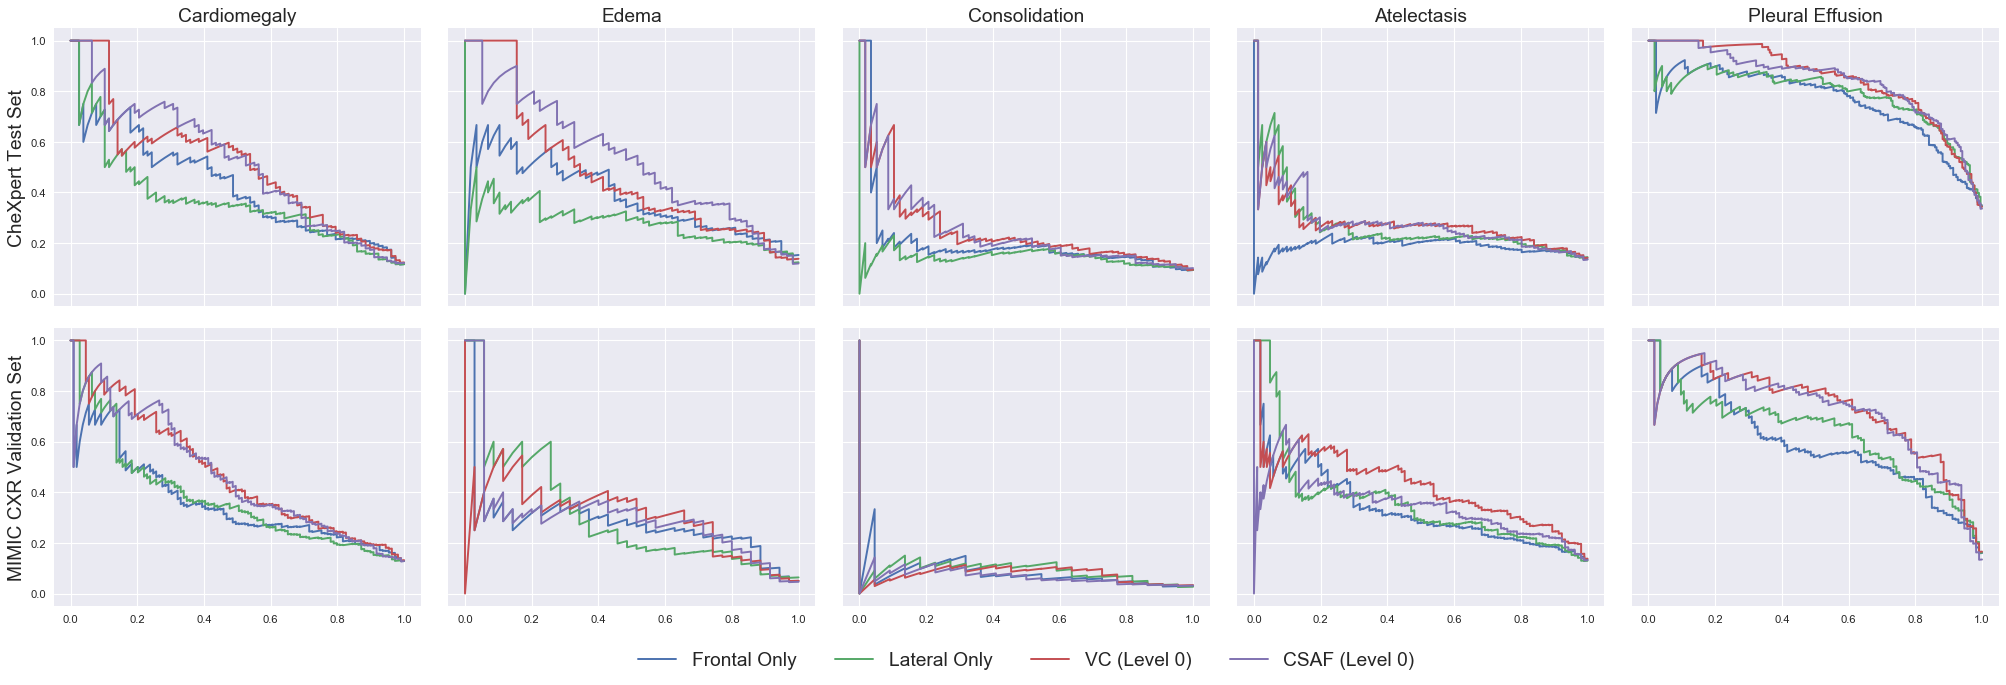

In [238]:
figure, axes = plt.subplots(
    nrows=2, ncols=len(PAPER_TRAINING_CLASSES),
    figsize=(25, 8), dpi=80,
    sharex=True, sharey=True,
)
figure.tight_layout()
# title = figure.suptitle('Precision-Recall Curve', fontsize='xx-large')

figure.subplots_adjust(top=0.95)

# Chexpert PR Curves
for i in range(len(PAPER_TRAINING_CLASSES)):
    for (model, model_title) in MODEL_NAMES:
        meter = CHEXPERT_PR_METERS[model]
        precision, recall, _ = sklearn.metrics.precision_recall_curve(meter.get_targets(i), meter.get_scores(i))
        axes[0][i].plot(recall, precision, label='{}'.format(model_title))
    axes[0][0].set_ylabel('CheXpert Test Set', fontsize='xx-large')
        
# MIMIC CXR PR Curves
for i in range(len(PAPER_TRAINING_CLASSES)):
    for (model, model_title) in MODEL_NAMES:
        meter = MIMIC_PR_METERS[model]
        precision, recall, _ = sklearn.metrics.precision_recall_curve(meter.get_targets(i), meter.get_scores(i))
        axes[1][i].plot(recall, precision, label='{}'.format(model_title))
    axes[1][2].legend(bbox_to_anchor=(0.5, -0.10), loc='upper center', ncol=4, fontsize='xx-large')
    axes[1][0].set_ylabel('MIMIC CXR Validation Set', fontsize='xx-large')
        

for i in range(len(PAPER_TRAINING_CLASSES)):
    axes[0][i].set_title(PAPER_TRAINING_CLASSES[i], fontsize='xx-large')

## 7. ROC Curves

In [241]:
MODEL_NAMES = [
    ('frontal_baseline', 'Frontal Only'),
    ('lateral_baseline', 'Lateral Only'),
#     ('fusion_baseline_0', 'FC (Level 0)'),
#     ('fusion_baseline_1', 'FC (Level 1)'),
#     ('fusion_baseline_2', 'FC (Level 2)'),
#     ('fusion_baseline_3', 'FC (Level 3)'),
#     ('fusion_baseline_4', 'FC (Level 4)'),
    ('volumetric_fusion', 'VC (Level 0)'),
#     ('cross_sectional_fusion_0', 'CSF (Level 0)'),
#     ('cross_sectional_fusion_4', 'CSV (Level 4)'),
    ('cross_sectional_attention_fusion_0', 'CSAF (Level 0)'),
#     ('cross_sectional_attention_fusion_4', 'CSAF (Level 4)'),
]


CHEXPERT_ROC_METERS = {
    'frontal_baseline'                  : frontal_baseline_chexpert_metrics['roc_meter'],
    'lateral_baseline'                  : lateral_baseline_chexpert_metrics['roc_meter'],
    'fusion_baseline_0'                 : fusion_baseline_0_chexpert_metrics['roc_meter'],
    'fusion_baseline_1'                 : fusion_baseline_1_chexpert_metrics['roc_meter'],
    'fusion_baseline_2'                 : fusion_baseline_2_chexpert_metrics['roc_meter'],
    'fusion_baseline_3'                 : fusion_baseline_3_chexpert_metrics['roc_meter'],
    'fusion_baseline_4'                 : fusion_baseline_4_chexpert_metrics['roc_meter'],
    'volumetric_fusion'                 : volumetric_fusion_chexpert_metrics['roc_meter'],
    'cross_sectional_fusion_0'          : cross_sectional_fusion_0_chexpert_metrics['roc_meter'],
    'cross_sectional_fusion_4'          : cross_sectional_fusion_4_chexpert_metrics['roc_meter'],
    'cross_sectional_attention_fusion_0': cross_sectional_attention_fusion_0_chexpert_metrics['roc_meter'],
    'cross_sectional_attention_fusion_4': cross_sectional_attention_fusion_4_chexpert_metrics['roc_meter'],
}

MIMIC_ROC_METERS = {
    'frontal_baseline'                  : frontal_baseline_mimic_metrics['roc_meter'],
    'lateral_baseline'                  : lateral_baseline_mimic_metrics['roc_meter'],
    'fusion_baseline_0'                 : fusion_baseline_0_mimic_metrics['roc_meter'],
    'fusion_baseline_1'                 : fusion_baseline_1_mimic_metrics['roc_meter'],
    'fusion_baseline_2'                 : fusion_baseline_2_mimic_metrics['roc_meter'],
    'fusion_baseline_3'                 : fusion_baseline_3_mimic_metrics['roc_meter'],
    'fusion_baseline_4'                 : fusion_baseline_4_mimic_metrics['roc_meter'],
    'volumetric_fusion'                 : volumetric_fusion_mimic_metrics['roc_meter'],
    'cross_sectional_fusion_0'          : cross_sectional_fusion_0_mimic_metrics['roc_meter'],
    'cross_sectional_fusion_4'          : cross_sectional_fusion_4_mimic_metrics['roc_meter'],
    'cross_sectional_attention_fusion_0': cross_sectional_attention_fusion_0_mimic_metrics['roc_meter'],
    'cross_sectional_attention_fusion_4': cross_sectional_attention_fusion_4_mimic_metrics['roc_meter'],
}

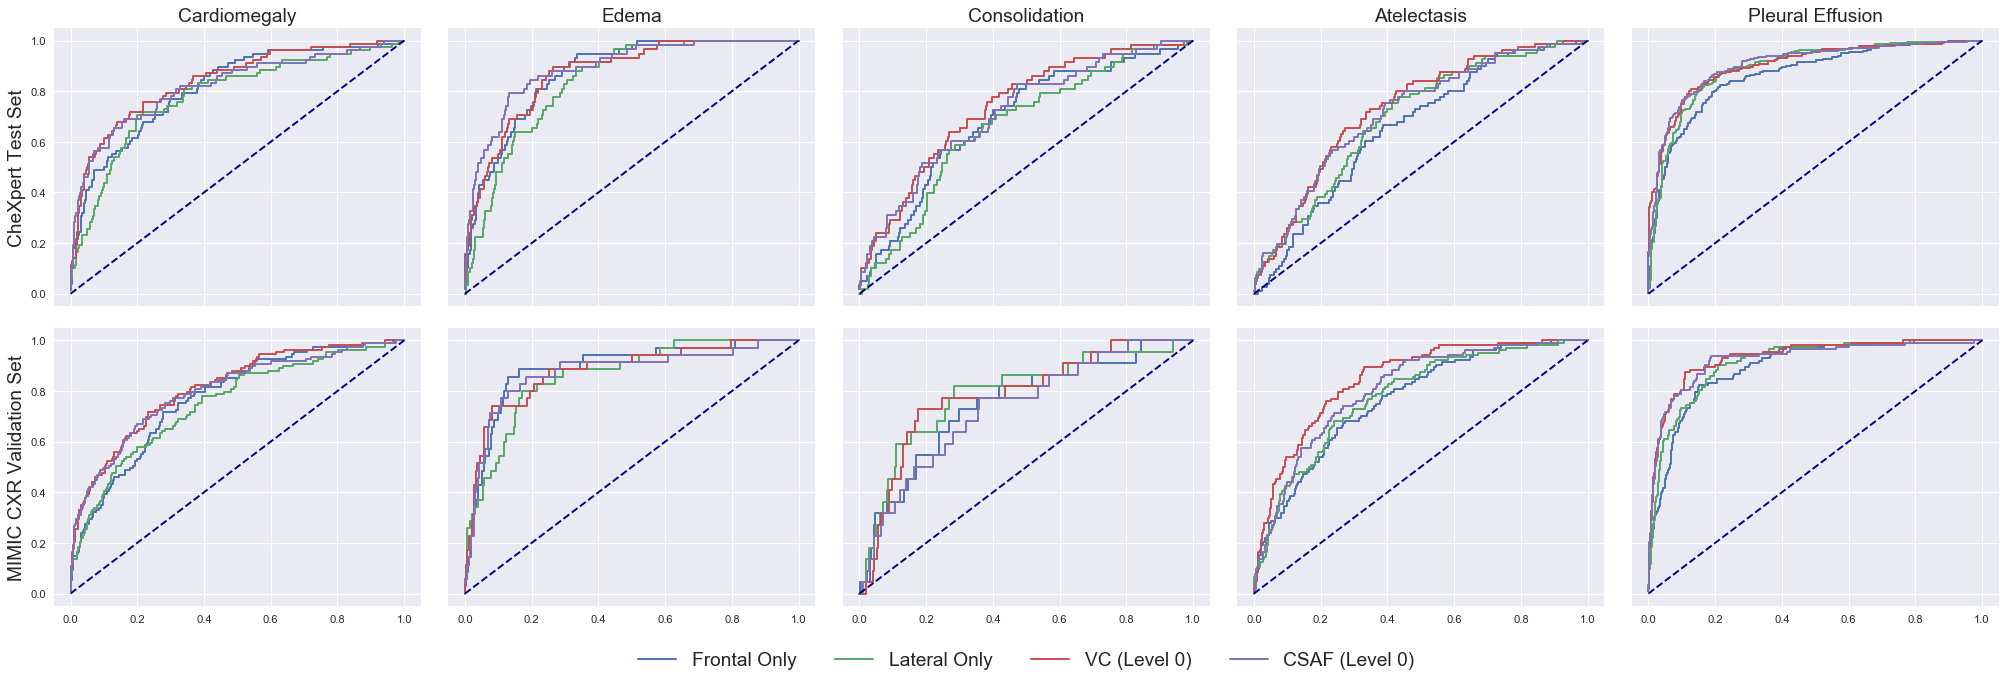

In [242]:
figure, axes = plt.subplots(
    nrows=2, ncols=len(PAPER_TRAINING_CLASSES),
    figsize=(25, 8), dpi=80,
    sharex=True, sharey=True,
)
figure.tight_layout()
# title = figure.suptitle('Receiver Operating Characteristic Curves', fontsize='x-large')

figure.subplots_adjust(top=0.95)

# Chexpert PR Curves
for i in range(len(PAPER_TRAINING_CLASSES)):
    for (model, model_title) in MODEL_NAMES:
        meter = CHEXPERT_ROC_METERS[model]
        fpr, tpr, _ = sklearn.metrics.roc_curve(meter.get_targets(i), meter.get_scores(i))
        axes[0][i].plot(fpr, tpr, label='{}'.format(model_title))
    axes[0][i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[0][0].set_ylabel('CheXpert Test Set', fontsize='xx-large')
        
        
# MIMIC CXR PR Curves
for i in range(len(PAPER_TRAINING_CLASSES)):
    for (model, model_title) in MODEL_NAMES:
        meter = MIMIC_ROC_METERS[model]
        fpr, tpr, _ = sklearn.metrics.roc_curve(meter.get_targets(i), meter.get_scores(i))
        axes[1][i].plot(fpr, tpr, label='{}'.format(model_title))
    axes[1][i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[1][2].legend(bbox_to_anchor=(0.5, -0.10), loc='upper center', ncol=4, fontsize='xx-large')
    axes[1][0].set_ylabel('MIMIC CXR Validation Set', fontsize='xx-large')

for i in range(len(PAPER_TRAINING_CLASSES)):
    axes[0][i].set_title(PAPER_TRAINING_CLASSES[i], fontsize='xx-large')

## 8. Latex Table

In [244]:
MODEL_NAMES = [
    ('frontal_baseline', 'Frontal Only'),
    ('lateral_baseline', 'Lateral Only'),
#     ('fusion_baseline_0', 'FC (Level 0)'),
#     ('fusion_baseline_1', 'FC (Level 1)'),
#     ('fusion_baseline_2', 'FC (Level 2)'),
#     ('fusion_baseline_3', 'FC (Level 3)'),
#     ('fusion_baseline_4', 'FC (Level 4)'),
    ('volumetric_fusion', 'VC (Level 0)'),
    ('cross_sectional_fusion_0', 'CSF (Level 0)'),
    ('cross_sectional_fusion_4', 'CSF (Level 4)'),
    ('cross_sectional_attention_fusion_0', 'CSAF (Level 0)'),
    ('cross_sectional_attention_fusion_4', 'CSAF (Level 4)'),
]


lines = []

line = '{}'.format(PAPER_TRAINING_CLASSES[0])
for class_name in PAPER_TRAINING_CLASSES[1:]:
    line += ' & {}'.format(class_name)
lines.append(line + '\\\\')
    
for (model, model_title) in MODEL_NAMES:
    chexpert_meter = CHEXPERT_PR_METERS[model]
    chexpert_values = chexpert_meter.values()
    
    mimic_meter = MIMIC_PR_METERS[model]
    mimic_values = mimic_meter.values()
    
    line = model_title
    line += ' & {:.3f} / {:.3f}'.format(chexpert_values['mean'], mimic_values['mean'])
    for i in range(len(PAPER_TRAINING_CLASSES)):
        line += ' & {:.3f} / {:.3f}'.format(chexpert_values[PAPER_TRAINING_CLASSES[i]], mimic_values[PAPER_TRAINING_CLASSES[i]])
    lines.append(line + '\\\\')
    lines.append('\\hline')
    
lines = '\n'.join(lines)
print(lines)

Cardiomegaly & Edema & Consolidation & Atelectasis & Pleural Effusion\\
Frontal Only & 0.395 / 0.334 & 0.431 / 0.365 & 0.390 / 0.286 & 0.200 / 0.087 & 0.192 / 0.338 & 0.762 / 0.593\\
\hline
Lateral Only & 0.373 / 0.354 & 0.372 / 0.376 & 0.285 / 0.314 & 0.148 / 0.095 & 0.272 / 0.360 & 0.785 / 0.627\\
\hline
VC (Level 0) & 0.473 / 0.406 & 0.509 / 0.480 & 0.474 / 0.314 & 0.255 / 0.080 & 0.282 / 0.428 & 0.847 / 0.728\\
\hline
CSF (Level 0) & 0.447 / 0.412 & 0.473 / 0.459 & 0.451 / 0.434 & 0.199 / 0.073 & 0.277 / 0.372 & 0.833 / 0.723\\
\hline
CSF (Level 4) & 0.427 / 0.398 & 0.441 / 0.459 & 0.388 / 0.359 & 0.205 / 0.087 & 0.266 / 0.395 & 0.832 / 0.690\\
\hline
CSAF (Level 0) & 0.485 / 0.385 & 0.515 / 0.469 & 0.532 / 0.313 & 0.250 / 0.072 & 0.286 / 0.351 & 0.840 / 0.718\\
\hline
CSAF (Level 4) & 0.463 / 0.379 & 0.511 / 0.435 & 0.498 / 0.291 & 0.216 / 0.083 & 0.268 / 0.364 & 0.824 / 0.720\\
\hline


In [246]:
MODEL_NAMES = [
    ('frontal_baseline', 'Frontal Only'),
    ('lateral_baseline', 'Lateral Only'),
#     ('fusion_baseline_0', 'FC (Level 0)'),
#     ('fusion_baseline_1', 'FC (Level 1)'),
#     ('fusion_baseline_2', 'FC (Level 2)'),
#     ('fusion_baseline_3', 'FC (Level 3)'),
#     ('fusion_baseline_4', 'FC (Level 4)'),
    ('volumetric_fusion', 'VC (Level 0)'),
    ('cross_sectional_fusion_0', 'CSF (Level 0)'),
    ('cross_sectional_fusion_4', 'CSF (Level 4)'),
    ('cross_sectional_attention_fusion_0', 'CSAF (Level 0)'),
    ('cross_sectional_attention_fusion_4', 'CSAF (Level 4)'),
]


lines = []

line = '{}'.format(PAPER_TRAINING_CLASSES[0])
for class_name in PAPER_TRAINING_CLASSES[1:]:
    line += ' & {}'.format(class_name)
lines.append(line + '\\\\')
    
for (model, model_title) in MODEL_NAMES:
    chexpert_meter = CHEXPERT_ROC_METERS[model]
    chexpert_values = chexpert_meter.values()
    
    mimic_meter = MIMIC_ROC_METERS[model]
    mimic_values = mimic_meter.values()
    
    line = model_title
    line += ' & {:.3f} / {:.3f}'.format(chexpert_values['mean'], mimic_values['mean'])
    for i in range(len(PAPER_TRAINING_CLASSES)):
        line += ' & {:.3f} / {:.3f}'.format(chexpert_values[PAPER_TRAINING_CLASSES[i]], mimic_values[PAPER_TRAINING_CLASSES[i]])
    lines.append(line + '\\\\')
    lines.append('\\hline')
    
lines = '\n'.join(lines)
print(lines)

Cardiomegaly & Edema & Consolidation & Atelectasis & Pleural Effusion\\
Frontal Only & 0.779 / 0.814 & 0.813 / 0.772 & 0.873 / 0.890 & 0.690 / 0.747 & 0.657 / 0.767 & 0.865 / 0.895\\
\hline
Lateral Only & 0.774 / 0.819 & 0.782 / 0.752 & 0.837 / 0.861 & 0.662 / 0.789 & 0.696 / 0.779 & 0.893 / 0.912\\
\hline
VC (Level 0) & 0.817 / 0.851 & 0.839 / 0.812 & 0.872 / 0.880 & 0.739 / 0.783 & 0.732 / 0.846 & 0.902 / 0.935\\
\hline
CSF (Level 0) & 0.805 / 0.843 & 0.823 / 0.811 & 0.876 / 0.901 & 0.690 / 0.749 & 0.738 / 0.824 & 0.898 / 0.928\\
\hline
CSF (Level 4) & 0.802 / 0.843 & 0.805 / 0.779 & 0.874 / 0.882 & 0.712 / 0.809 & 0.720 / 0.800 & 0.902 / 0.945\\
\hline
CSAF (Level 0) & 0.809 / 0.827 & 0.820 / 0.799 & 0.892 / 0.874 & 0.714 / 0.732 & 0.715 / 0.805 & 0.905 / 0.925\\
\hline
CSAF (Level 4) & 0.811 / 0.845 & 0.843 / 0.790 & 0.881 / 0.889 & 0.704 / 0.781 & 0.734 / 0.823 & 0.894 / 0.942\\
\hline
